In [11]:

import pandas as pd
import numpy as np


# Load the dataset
# Ensure 'Dataset .csv' is uploaded to your Colab environment
df = pd.read_csv('/content/Dataset .csv')

print("Data Loaded Successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
display(df.head(3))

Data Loaded Successfully!
Rows: 9551, Columns: 21


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


# Level 1



Task 1: Data Exploration and Preprocessing

In [12]:
# Cell 2: Level 1 Task 1
# Libraries needed for this task

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identify rows and columns
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# 2. Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())



Dataset contains 9551 rows and 21 columns.

Missing Values per Column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [13]:
# Handle missing values (Example: Drop rows with missing 'Cuisines' as they are few)
df_clean = df.dropna(subset=['Cuisines']).copy()
print(f"\nRows after handling missing values: {df_clean.shape[0]}")

# 3. Data type conversion
# (Checking if 'Votes' or 'Aggregate rating' are numeric - they usually are)
print("\nData Types:")
print(df_clean.dtypes)


Rows after handling missing values: 9542

Data Types:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


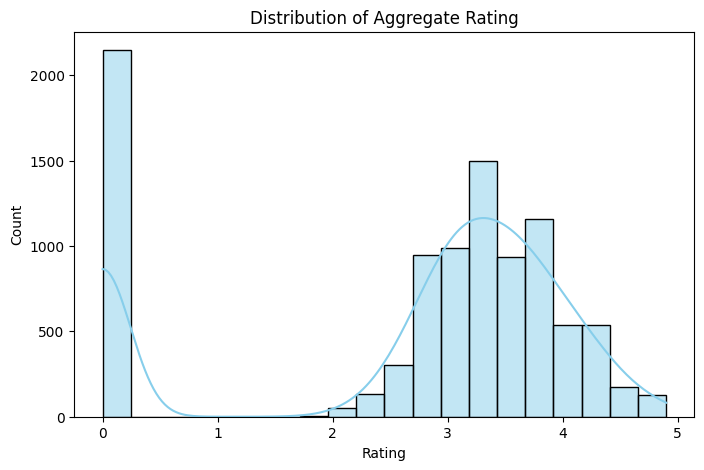

In [14]:
# 4. Analyze distribution of 'Aggregate rating'
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Rating')
plt.show()

In [15]:
# Check for class imbalance (Target variable counts)
print("\nClass Imbalance Check (Rating counts):")
print(df_clean['Aggregate rating'].value_counts().sort_index())


Class Imbalance Check (Rating counts):
Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     495
3.5     480
3.6     458
3.7     427
3.8     399
3.9     332
4.0     266
4.1     274
4.2     221
4.3     174
4.4     143
4.5      95
4.6      78
4.7      41
4.8      25
4.9      61
Name: count, dtype: int64


Task 2: Descriptive Analysis

In [16]:


# 1. Statistical measures for numerical columns
print("Descriptive Statistics:")
display(df_clean.describe())



Descriptive Statistics:


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [17]:
# 2. Explore distribution of categorical variables
# Country Code
print("\nUnique Country Codes:", df_clean['Country Code'].nunique())
# City
print("Unique Cities:", df_clean['City'].nunique())
# Cuisines
print("Unique Cuisines:", df_clean['Cuisines'].nunique())




Unique Country Codes: 15
Unique Cities: 140
Unique Cuisines: 1825


/tmp/ipython-input-2567524841.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, ax=axes[0], palette='viridis')
/tmp/ipython-input-2567524841.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, ax=axes[1], palette='magma')


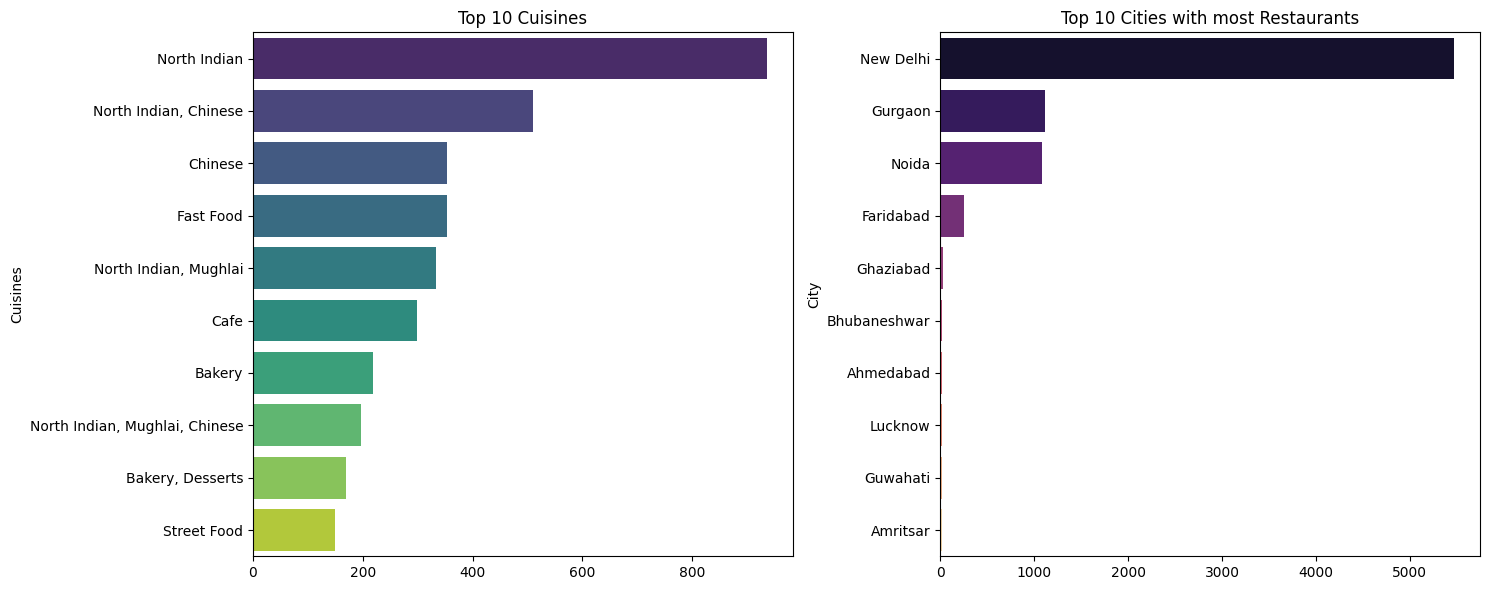

In [18]:
# 3. Top Cuisines and Cities
top_cuisines = df_clean['Cuisines'].value_counts().head(10)
top_cities = df_clean['City'].value_counts().head(10)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=top_cuisines.values, y=top_cuisines.index, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Cuisines')

sns.barplot(x=top_cities.values, y=top_cities.index, ax=axes[1], palette='magma')
axes[1].set_title('Top 10 Cities with most Restaurants')

plt.tight_layout()
plt.show()

Task 3: Geospatial Analysis

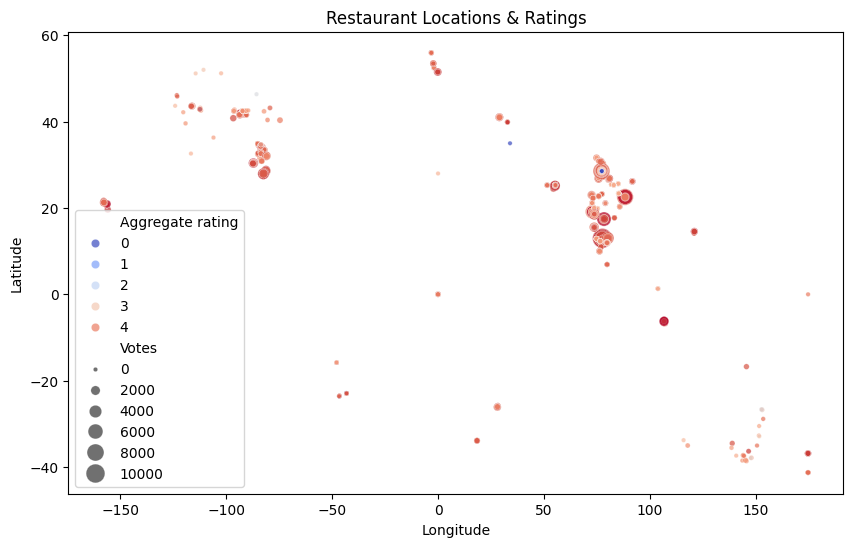

In [19]:


# 1. Visualize locations (Latitude vs Longitude)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Longitude', y='Latitude', hue='Aggregate rating', palette='coolwarm', size='Votes', sizes=(10, 200), alpha=0.7)
plt.title('Restaurant Locations & Ratings')
plt.show()



In [20]:
# 2. Distribution across cities
print("\nDistribution of Restaurants across Cities (Top 5):")
print(df_clean['City'].value_counts().head())




Distribution of Restaurants across Cities (Top 5):
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64


In [21]:
# 3. Correlation between location and rating
loc_corr = df_clean[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("\nCorrelation Matrix:")
display(loc_corr)


Correlation Matrix:


,Latitude,Longitude,Aggregate rating
Latitude,1.000000,0.045415,0.000197
Longitude,0.045415,1.000000,-0.114733
Aggregate rating,0.000197,-0.114733,1.000000


# Level 2 Tasks

Task 1: Table Booking and Online Delivery

In [22]:


# 1. Percentage of Table Booking and Online Delivery
tbl_book = df_clean['Has Table booking'].value_counts(normalize=True) * 100
online_del = df_clean['Has Online delivery'].value_counts(normalize=True) * 100

print(f"Table Booking: Yes ({tbl_book['Yes']:.2f}%), No ({tbl_book['No']:.2f}%)")
print(f"Online Delivery: Yes ({online_del['Yes']:.2f}%), No ({online_del['No']:.2f}%)")



Table Booking: Yes (12.14%), No (87.86%)
Online Delivery: Yes (25.69%), No (74.31%)


In [23]:
# 2. Compare average ratings
avg_rating_booking = df_clean.groupby('Has Table booking')['Aggregate rating'].mean()
print("\nAverage Rating (Table Booking vs None):")
print(avg_rating_booking)




Average Rating (Table Booking vs None):
Has Table booking
No     2.557956
Yes    3.441969
Name: Aggregate rating, dtype: float64



Online Delivery availability by Price Range:


Has Online delivery,No,Yes
Price range,,
1,0.842046,0.157954
2,0.586894,0.413106
3,0.707473,0.292527
4,0.909556,0.090444


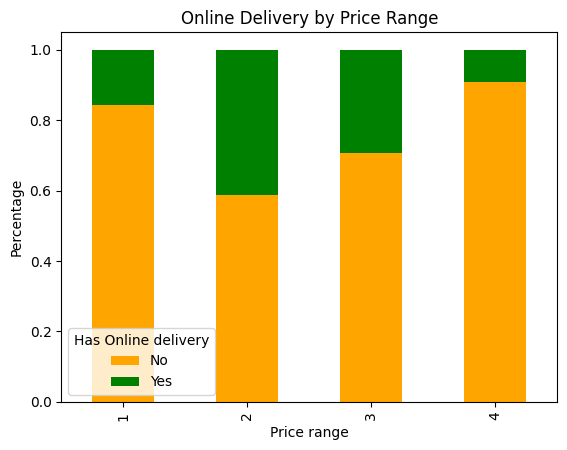

In [24]:
# 3. Online Delivery by Price Range
delivery_price = df_clean.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()
print("\nOnline Delivery availability by Price Range:")
display(delivery_price)

delivery_price.plot(kind='bar', stacked=True, color=['orange', 'green'])
plt.title('Online Delivery by Price Range')
plt.ylabel('Percentage')
plt.show()

Task 2: Price Range Analysis

In [25]:


# 1. Most common price range
common_price = df_clean['Price range'].mode()[0]
print(f"Most Common Price Range: {common_price}")



Most Common Price Range: 1


In [26]:
# 2. Average rating for each price range
avg_price_rating = df_clean.groupby('Price range')['Aggregate rating'].mean()
print("\nAverage Rating per Price Range:")
print(avg_price_rating)




Average Rating per Price Range:
Price range
1    1.997476
2    2.941054
3    3.682633
4    3.817918
Name: Aggregate rating, dtype: float64


In [27]:
# 3. Color with highest average rating
# Mapping colors to ratings to see which color group performs best
color_ratings = df_clean.groupby('Rating color')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Rating per Color Group:")
print(color_ratings)
print(f"\nHighest Rated Color: {color_ratings.idxmax()}")


Average Rating per Color Group:
Rating color
Dark Green    4.659667
Green         4.167904
Yellow        3.683063
Orange        3.051339
Red           2.297849
White         0.000000
Name: Aggregate rating, dtype: float64

Highest Rated Color: Dark Green


Task 3: Feature Engineering

In [28]:
# 1. Extract length of Name and Address
df_clean['Name Length'] = df_clean['Restaurant Name'].apply(len)
df_clean['Address Length'] = df_clean['Address'].apply(len)
print("Features 'Name Length' and 'Address Length' created.")



Features 'Name Length' and 'Address Length' created.


In [29]:
# 2. Encode categorical variables (Yes/No to 1/0)
df_clean['Has Table booking'] = df_clean['Has Table booking'].map({'Yes': 1, 'No': 0})
df_clean['Has Online delivery'] = df_clean['Has Online delivery'].map({'Yes': 1, 'No': 0})

print("\nEncoded 'Has Table booking' and 'Has Online delivery'.")
display(df_clean[['Restaurant Name', 'Has Table booking', 'Has Online delivery']].head())


Encoded 'Has Table booking' and 'Has Online delivery'.


,Restaurant Name,Has Table booking,Has Online delivery
0,Le Petit Souffle,1,0
1,Izakaya Kikufuji,1,0
2,Heat - Edsa Shangri-La,1,0
3,Ooma,0,0
4,Sambo Kojin,1,0


# Level 3 Tasks

Task 1: Predictive Modeling

In [30]:
# Cell 8: Level 3 Task 1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Select features and target
features = ['Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Price range', 'Votes']
target = 'Aggregate rating'

X = df_clean[features]
y = df_clean[target]

# 1. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build and Evaluate Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42)
}

print("Model Evaluation:")
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{name} -> MSE: {mse:.4f}, R2: {r2:.4f}")

Model Evaluation:
Linear Regression -> MSE: 1.6276, R2: 0.2893
Decision Tree -> MSE: 0.2052, R2: 0.9104
Random Forest -> MSE: 0.1325, R2: 0.9421


Task 2: Customer Preference Analysis

/tmp/ipython-input-2645441297.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='cool')


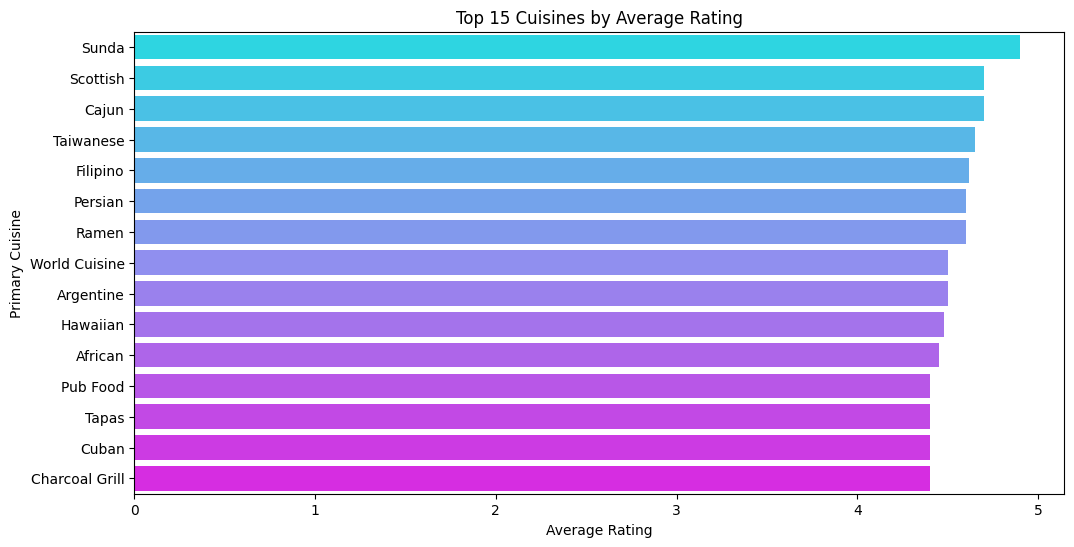

In [31]:


# 1. Analyze relationship between Cuisine and Rating
# Extract primary cuisine (first one listed) for simpler analysis
df_clean['Primary Cuisine'] = df_clean['Cuisines'].apply(lambda x: x.split(',')[0])

# Top 15 Cuisines by Average Rating
cuisine_ratings = df_clean.groupby('Primary Cuisine')['Aggregate rating'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='cool')
plt.title('Top 15 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.show()



In [32]:
# 2. Most popular cuisines (by number of votes)
popular_cuisines = df_clean.groupby('Primary Cuisine')['Votes'].sum().sort_values(ascending=False).head(10)
print("\nMost Popular Cuisines (Total Votes):")
print(popular_cuisines)


Most Popular Cuisines (Total Votes):
Primary Cuisine
North Indian    356684
Cafe            116576
American        105447
Italian          95153
Continental      94569
Chinese          84918
European         45842
Fast Food        42617
Bakery           42008
Pizza            36415
Name: Votes, dtype: int64


Task 3: Data Visualization

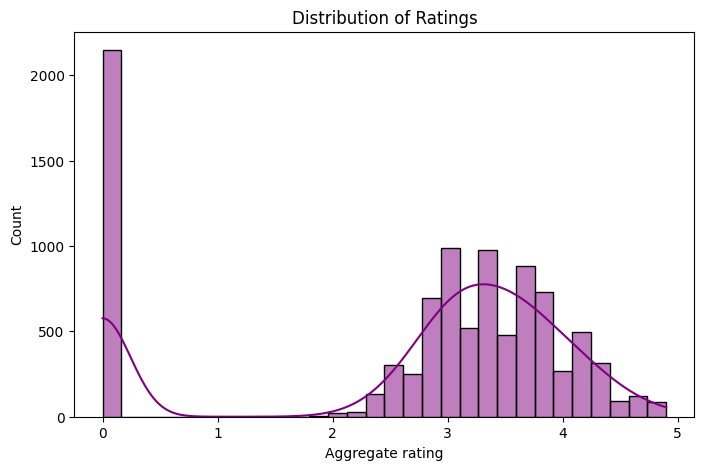

In [33]:
# 1. Distribution of Ratings (Detailed)
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Aggregate rating'], bins=30, kde=True, color='purple')
plt.title('Distribution of Ratings')
plt.show()



/tmp/ipython-input-1438416605.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities_rating.values, y=top_cities_rating.index, palette='autumn')


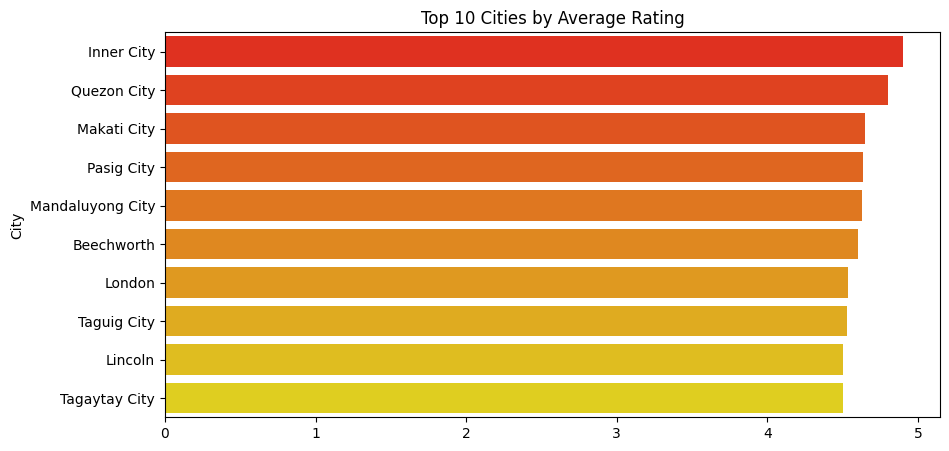

In [34]:
# 2. Compare Average Ratings of Top 10 Cities
top_cities_rating = df_clean.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities_rating.values, y=top_cities_rating.index, palette='autumn')
plt.title('Top 10 Cities by Average Rating')
plt.show()



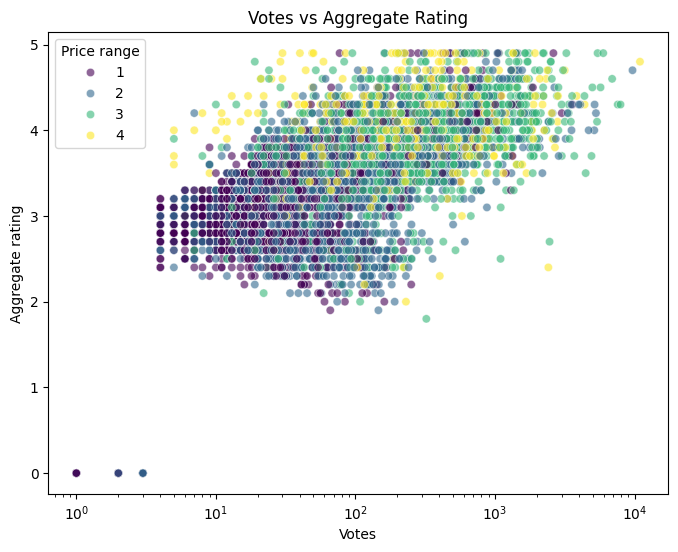

In [35]:
# 3. Relationship between Votes and Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df_clean, hue='Price range', palette='viridis', alpha=0.6)
plt.title('Votes vs Aggregate Rating')
plt.xscale('log') # Log scale helps visualization as votes vary widely
plt.show()